In [30]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import pymongo
import numpy as np
from slugify import slugify
from re import match
import glob

In [9]:
myclient = pymongo.MongoClient("mongodb://localhost:27017/")
mydb = myclient["covid19"]
collectionPacientes = mydb["pacientes"]
tblExames = mydb["exames"]
tblPD = mydb["pacientes_desfechos"]

In [41]:
def updateCollectionPaciente(mycol, ID, values):
    myquery = { "ID_PACIENTE": ID }
    newvalues = { "$set": values }
    mycol.update_one(myquery, newvalues)

In [45]:
def updatePaciente(ID, gravidade, comorbidade):
    values = {'GRAVIDADE': gravidade,'COMORBIDADE': comorbidade}
    updateCollectionPaciente(collectionPacientes, ID, values)

In [68]:
def createAcidoseAlcose(row): 
    ret = ""
    if(row['ACIDOSE_METABOLICA']):
        ret = "Acidose Metabolica "
    elif(row['ACIDOSE_RESPIRATORIA']):
        ret = "Acidose Respiratória "
    elif(row['ALCALOSE_METABOLICA']):
        ret = "Alcalose Metabólica "
    elif(row['ALCALOSE_RESPIRATORIA']):
        ret = "Alcalose Respiratória "

    if(row['DESNUTRICAO']):
        ret = ret + "Desnutricao"
    
    return ret

In [57]:
pipeline = [
     { "$group": { "_id": "$ID_PACIENTE", "DE_ORIGENS": {"$addToSet": "$DE_ORIGEM"} }}
]
results = tblExames.aggregate(pipeline)
for r in results:
    comorbidade = "Sem comorbidade"
    gravidade = "Assintomatico"
    origens = list(r['DE_ORIGENS'])
    if( 'Centro Cirurgico' in origens):
        gravidade = "Gravissimo"
    elif( 'UTI' in origens):
        gravidade = "Grave"
    elif ('Unidades de Internacao'):
        gravidade = "Medio"
        
    if( 'Hemodialise' in origens):
        comorbidade = "Com comorbidade"
    
    if( len(list(filter(lambda v: match('.*Oncologia*', v), origens))) > 0):
        comorbidade = "Com comorbidade"
    
    updatePaciente(r['_id'], gravidade, comorbidade)


Oncologia
Oncologia
Oncologia
Oncologia
Oncologia
Oncologia
Oncologia
Oncologia
Oncologia
Oncologia
Oncologia
Oncologia
Oncologia
Oncologia
Oncologia
Oncologia
Oncologia
Oncologia
Oncologia
Oncologia
Oncologia
Oncologia
Oncologia
Oncologia
Oncologia
Oncologia
Oncologia
Oncologia
Oncologia
Oncologia
Oncologia
Oncologia
Oncologia
Oncologia
Oncologia
Oncologia
Oncologia
Oncologia
Oncologia
Oncologia
Oncologia
Oncologia
Oncologia
Oncologia
Oncologia
Oncologia
Oncologia
Oncologia
Oncologia
Oncologia
Oncologia
Oncologia
Oncologia
Oncologia
Oncologia
Oncologia
Oncologia
Oncologia
Oncologia
Oncologia
Oncologia
Oncologia
Oncologia
Oncologia
Oncologia
Oncologia
Oncologia
Oncologia
Oncologia
Oncologia
Oncologia
Oncologia
Oncologia
Oncologia
Oncologia
Oncologia
Oncologia
Oncologia
Oncologia
Oncologia
Oncologia
Oncologia
Oncologia
Oncologia
Oncologia
Oncologia
Oncologia
Oncologia
Oncologia
Oncologia
Oncologia
Oncologia
Oncologia
Oncologia
Oncologia
Oncologia
Oncologia
Oncologia
Oncologia
Oncologia


In [113]:
#cursor = tblExames.find({"DE_EXAME": "Creatinina"}).project({'ID_PACINENTE': 1, "DE_RESULTADO": 1, "DE_VALOR_REFERENCIA": 1})
#df =  pd.DataFrame(list(cursor))
#df['DE_RESULTADO'] = df['DE_RESULTADO'].astype("float", errors="ignore")
#print(df)
myquery = {"DE_EXAME": "Creatinina",
           "$expr": { "$gte": [{"$convert": {"input": "$DE_RESULTADO", "to": "double", "onError": "$DE_RESULTADO" }}, 1.1]}}
           
        

mydoc = tblExames.find(myquery)

for d in mydoc:
    #print(d['ID_PACIENTE'])
    updateCollectionPaciente(collectionPacientes, d['ID_PACIENTE'], {"CreatininaAlta": True})

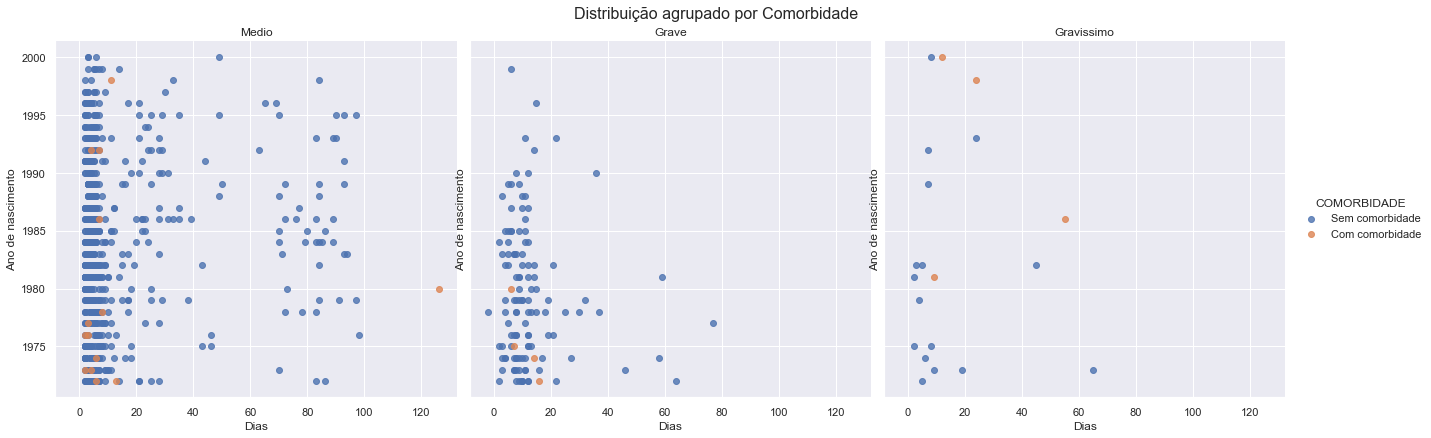

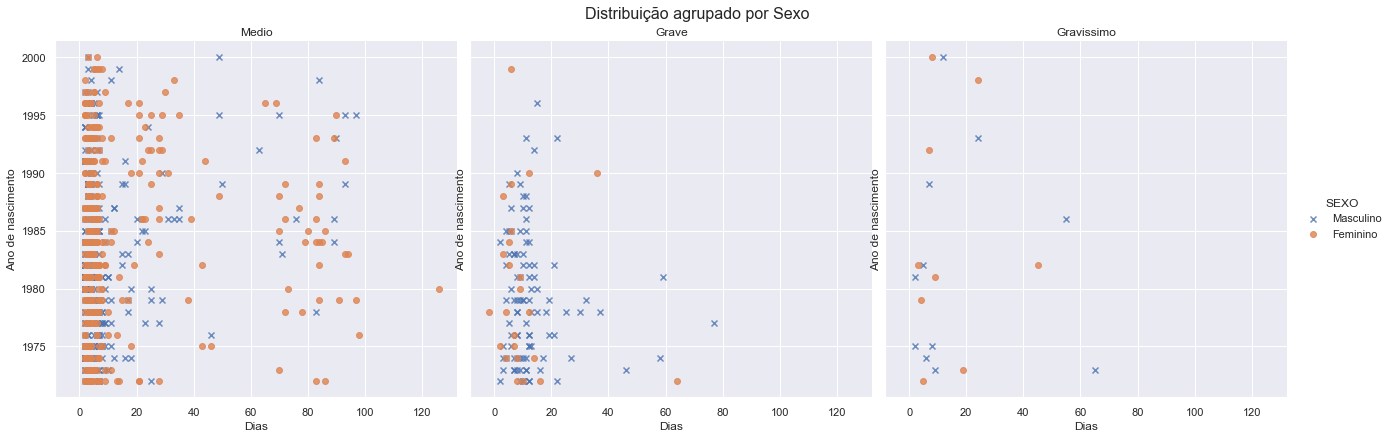

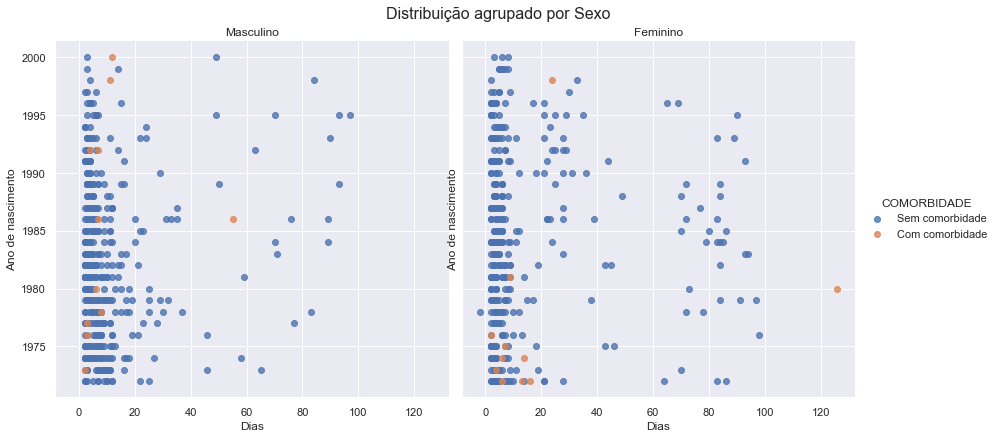

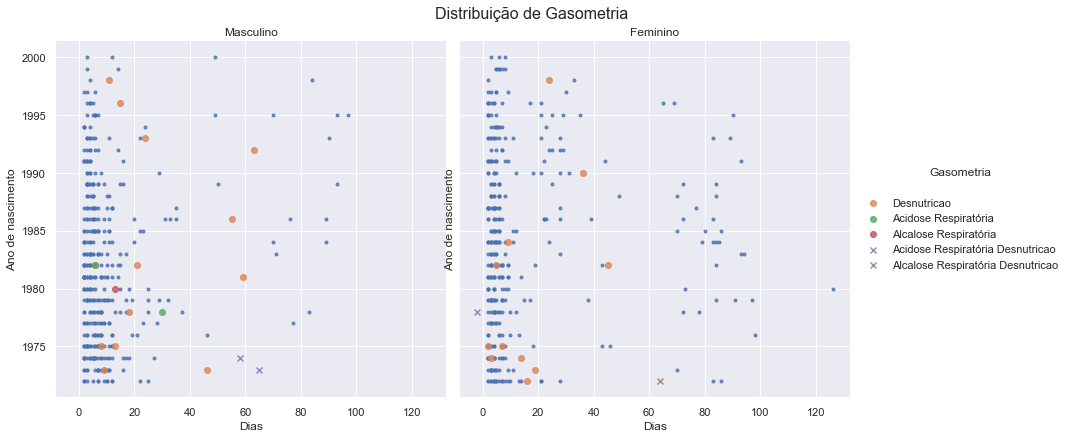

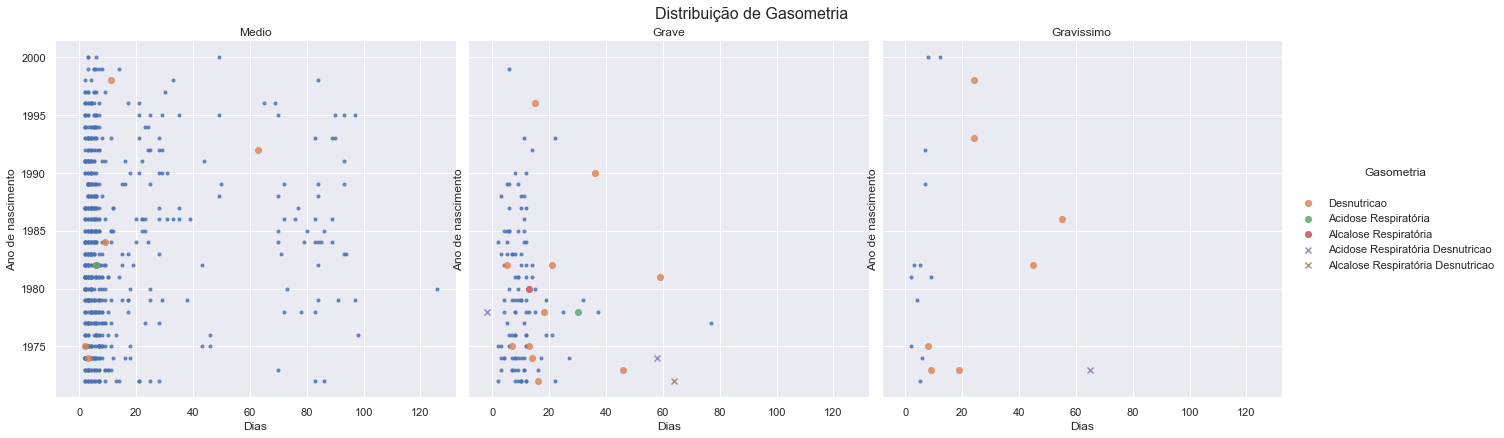

In [102]:
cursor = collectionPacientes.find()
df =  pd.DataFrame(list(cursor))
df['SEXO'] = df['IC_SEXO'].apply(lambda x: "Masculino" if x in 'M' else "Feminino")


sns.set( rc = {'figure.figsize' : ( 20, 20 ),  'axes.labelsize' : 12 })
ax = sns.lmplot(x='DAYS', y='aa_nascimento',height=6,data=df, fit_reg=False, hue='COMORBIDADE', col="GRAVIDADE")
ax.fig.suptitle("Distribuição agrupado por Comorbidade", fontsize=16) 
ax.fig.subplots_adjust( top = .9 )
#plt.fig.set_axis_labels("Dias", axislabel)
ax.set_titles(col_template="{col_name}", row_template="{row_name}")
ax.set(xlabel='Dias', ylabel='Ano de nascimento')
ax.fig.savefig("distribuicao-gravidade-comorbidade.png")

sns.set( rc = {'figure.figsize' : ( 20, 20 ),  'axes.labelsize' : 12 })
ax = sns.lmplot(x='DAYS', y='aa_nascimento',height=6,data=df, fit_reg=False, hue='SEXO', col="GRAVIDADE", markers=["x", "o"])
ax.fig.suptitle("Distribuição agrupado por Sexo", fontsize=16) 
ax.fig.subplots_adjust( top = .9 )
#plt.fig.set_axis_labels("Dias", axislabel)
ax.set_titles(col_template="{col_name}", row_template="{row_name}")
ax.set(xlabel='Dias', ylabel='Ano de nascimento')
ax.fig.savefig("distribuicao-gravidade-sexo.png")

sns.set( rc = {'figure.figsize' : ( 20, 20 ),  'axes.labelsize' : 12 })
ax = sns.lmplot(x='DAYS', y='aa_nascimento',height=6,data=df, fit_reg=False, hue='COMORBIDADE', col="SEXO")
ax.fig.suptitle("Distribuição agrupado por Sexo", fontsize=16) 
ax.fig.subplots_adjust( top = .9 )
#plt.fig.set_axis_labels("Dias", axislabel)
ax.set_titles(col_template="{col_name}", row_template="{row_name}")
ax.set(xlabel='Dias', ylabel='Ano de nascimento')
ax.fig.savefig("distribuicao-comorbidade-sexo.png")

df['Gasometria'] = df.apply(lambda row: createAcidoseAlcose(row), axis = 1)

sns.set( rc = {'figure.figsize' : ( 20, 20 ),  'axes.labelsize' : 12 })
ax = sns.lmplot(x='DAYS', y='aa_nascimento',height=6, data=df, fit_reg=False, hue='Gasometria', col="SEXO", markers=[".", "o", "o", "o", "x", "x"])
ax.fig.suptitle("Distribuição de Gasometria", fontsize=16) 
ax.fig.subplots_adjust( top = .9 )
ax._legend.set_title("Gasometria")
ax.set(xlabel='Dias', ylabel='Ano de nascimento')
ax.set_titles(col_template="{col_name}", row_template="{row_name}")
ax.fig.savefig("distribuicao-gasometria-sexo.png")


sns.set( rc = {'figure.figsize' : ( 20, 20 ),  'axes.labelsize' : 12 })
ax = sns.lmplot(x='DAYS', y='aa_nascimento',height=6, data=df, fit_reg=False, hue='Gasometria', col="GRAVIDADE", markers=[".", "o", "o", "o", "x", "x"])
ax.fig.suptitle("Distribuição de Gasometria", fontsize=16) 
ax.fig.subplots_adjust( top = .9 )
ax._legend.set_title("Gasometria")
ax.set(xlabel='Dias', ylabel='Ano de nascimento')
ax.set_titles(col_template="{col_name}", row_template="{row_name}")
ax.fig.savefig("distribuicao-gasometria-sexo.png")

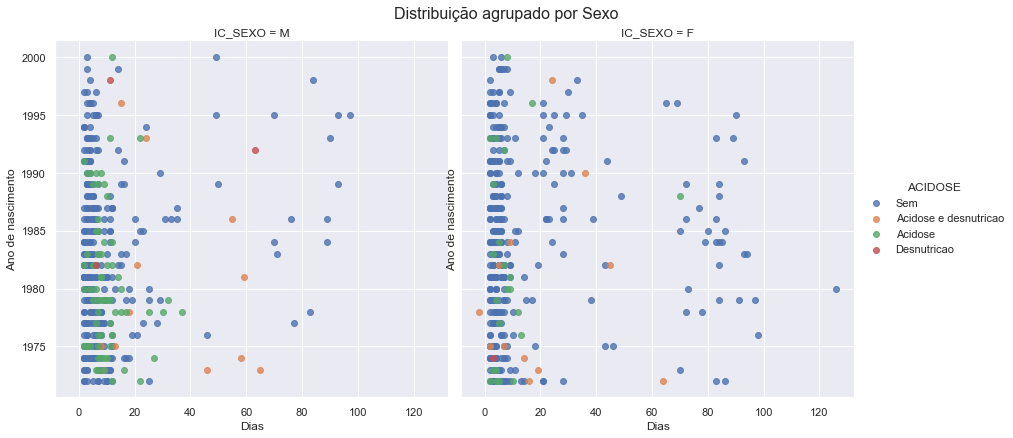

In [66]:
def hueCreate(acidose, desnutricao): 
    if(not acidose and not desnutricao):
        return "Sem"
    elif(acidose and desnutricao):
        return "Acidose e desnutricao"
    elif(acidose and not desnutricao):
        return "Acidose"
    elif(not acidose and desnutricao):
        return "Desnutricao"
    
    return "Sem"

cursor = collectionPacientes.find()
df =  pd.DataFrame(list(cursor))
df['Gasometria'] = df.apply(lambda row: createAcidoseAlcose(row['ACIDOSE'], row['DESNUTRICAO']), axis = 1)

sns.set( rc = {'figure.figsize' : ( 20, 20 ),  'axes.labelsize' : 12 })
ax = sns.lmplot(x='DAYS', y='aa_nascimento',height=6,data=df, fit_reg=False, hue='ACIDOSE', col="IC_SEXO")
ax.fig.suptitle("Distribuição agrupado por Sexo", fontsize=16) 
ax.fig.subplots_adjust( top = .9 )
#plt.fig.set_axis_labels("Dias", axislabel)
ax.set(xlabel='Dias', ylabel='Ano de nascimento')

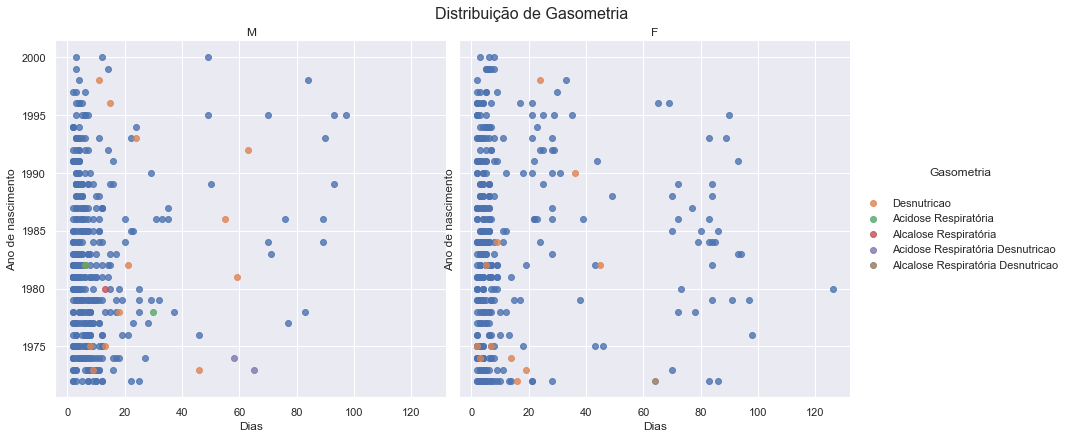

In [67]:
def hueCreate(row): 
    ret = ""
    if(row['ACIDOSE_METABOLICA']):
        ret = "Acidose Metabolica "
    elif(row['ACIDOSE_RESPIRATORIA']):
        ret = "Acidose Respiratória "
    elif(row['ALCALOSE_METABOLICA']):
        ret = "Alcalose Metabólica "
    elif(row['ALCALOSE_RESPIRATORIA']):
        ret = "Alcalose Respiratória "

    if(row['DESNUTRICAO']):
        ret = ret + "Desnutricao"
    
    return ret

cursor = collectionPacientes.find({"DAYS": {"$gte": 1}})
df =  pd.DataFrame(list(cursor))

df['Gasometria'] = df.apply(lambda row: createAcidoseAlcose(row), axis = 1)

sns.set( rc = {'figure.figsize' : ( 20, 20 ),  'axes.labelsize' : 12 })
ax = sns.lmplot(x='DAYS', y='aa_nascimento',height=6, data=df, fit_reg=False, hue='HUE', col="IC_SEXO") #, markers=[".", "o", "o", "o"])
ax.fig.suptitle("Distribuição de Gasometria", fontsize=16) 
ax.fig.subplots_adjust( top = .9 )
ax._legend.set_title("Gasometria")
ax.set(xlabel='Dias', ylabel='Ano de nascimento')
ax.set_titles(col_template="{col_name}", row_template="{row_name}")
ax.fig.savefig("gosmetria.png")